In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Load datasets
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv', encoding='latin-1')
payments = pd.read_csv('payments.csv')
geolocation = pd.read_csv('geolocation.csv')

# Check shapes
print("Customers:", customers.shape)
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Products:", products.shape)
print("Sellers:", sellers.shape)
print("Payments:", payments.shape)
print("Geolocation:", geolocation.shape)

Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)
Sellers: (3095, 4)
Payments: (103886, 5)
Geolocation: (1000163, 5)


In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [ ]:
customers.head()
orders.head()
order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 9:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Merge orders and order_items
merged = orders.merge(order_items, on='order_id')

# Merge products
merged = merged.merge(products, on='product_id')

# Rename 'product category' to 'product_category_name' for consistency
# Check if 'product category' exists to avoid error if already renamed or if name is different
if 'product category' in merged.columns:
    merged = merged.rename(columns={'product category': 'product_category_name'})

# Merge customers
merged = merged.merge(customers, on='customer_id')

# Create total revenue column
merged['total_value'] = merged['price'] + merged['freight_value']

print("Merged dataset shape:", merged.shape)
merged.head()

Merged dataset shape: (112650, 27)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62


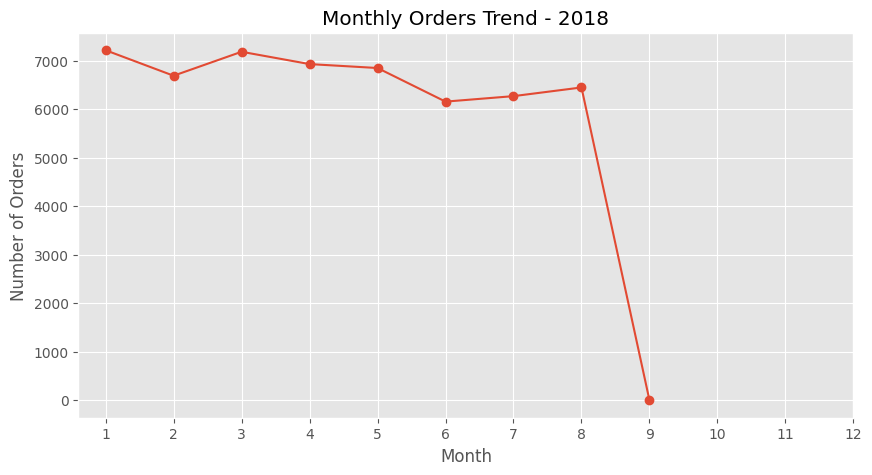

In [ ]:
# Extract year and month
merged['year'] = merged['order_purchase_timestamp'].dt.year
merged['month'] = merged['order_purchase_timestamp'].dt.month

# Filter 2018
data_2018 = merged[merged['year'] == 2018]

monthly_orders = (
    data_2018.groupby('month')['order_id']
    .nunique()
)

plt.figure(figsize=(10,5))
monthly_orders.plot(marker='o')
plt.title('Monthly Orders Trend - 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1,13))
plt.show()


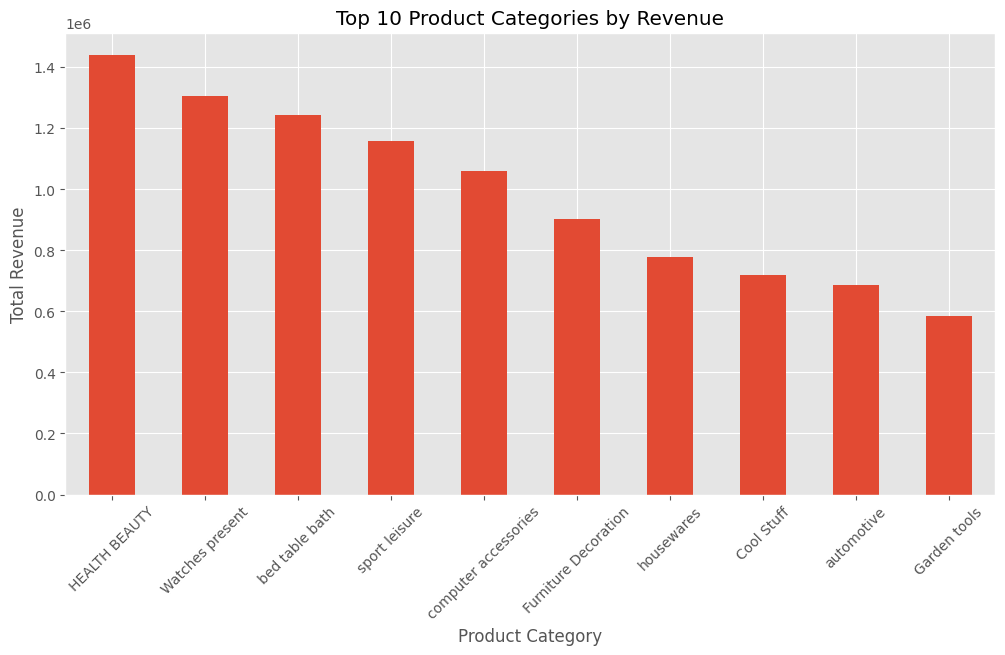

In [ ]:
category_revenue = (
    merged.groupby('product_category_name')['total_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
category_revenue.plot(kind='bar')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

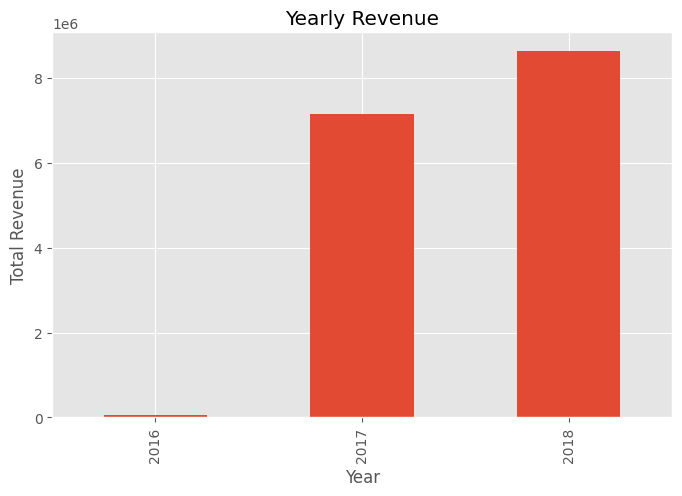

In [ ]:
merged['year'] = merged['order_purchase_timestamp'].dt.year
yearly_revenue = (
    merged.groupby('year')['total_value']
    .sum()
)

plt.figure(figsize=(8,5))
yearly_revenue.plot(kind='bar')
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

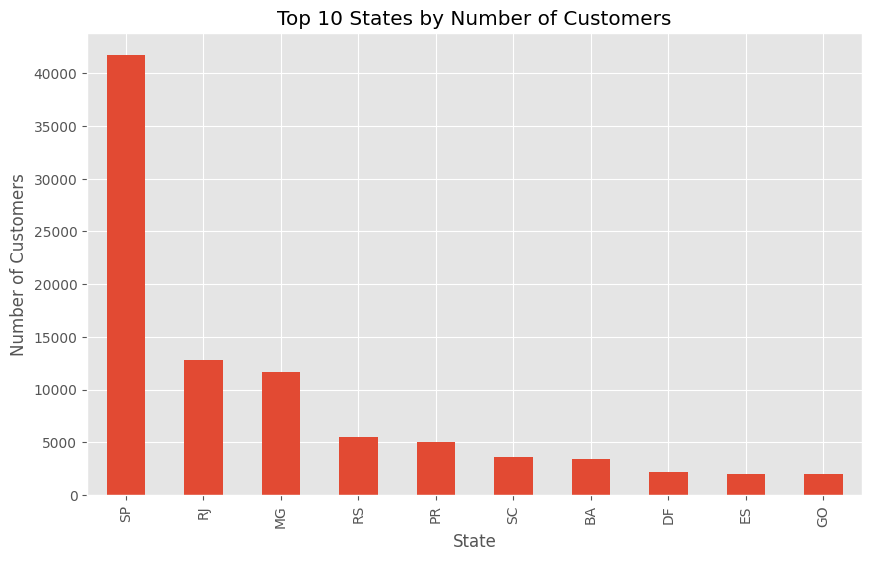

In [ ]:
state_customers = (
    customers.groupby('customer_state')['customer_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
state_customers.plot(kind='bar')
plt.title('Top 10 States by Number of Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()


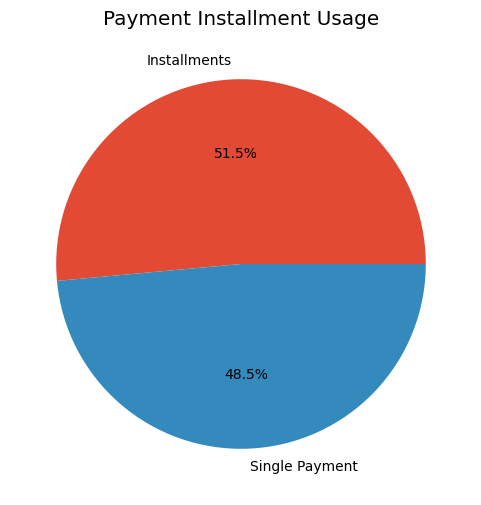

In [ ]:
installment_orders = payments[payments['payment_installments'] > 1]['order_id'].nunique()
total_orders = payments['order_id'].nunique()

labels = ['Installments', 'Single Payment']
sizes = [installment_orders, total_orders - installment_orders]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Payment Installment Usage')
plt.show()
